In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
train_data = pd.read_csv("train.csv")

In [0]:
test_data = pd.read_csv("test.csv")

In [0]:
tt = pd.read_csv("test.csv")
print(tt.shape)

(2345796, 3)


In [0]:
tt["question1"].isnull().sum()

2

In [0]:
tt["question2"].isnull().sum()

4

In [0]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
train_data.shape

(404290, 6)

In [0]:
test_data.shape

(2345796, 3)

In [0]:
test_data.fillna(value = " ",inplace = True)

In [0]:
test_data[['question1','question2']].isnull().sum()

question1    0
question2    0
dtype: int64

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
def striphtml(data): 
    cleanr = re.compile('<.*?>') 
    cleantext = re.sub(cleanr, ' ', str(data)) 
    return cleantext   

In [0]:
def stripunc(data): 
    return re.sub('[^A-Za-z]+', ' ', str(data), flags=re.MULTILINE|re.DOTALL) 

In [0]:
x = "Hello, World! <how are you?>"

In [0]:
stripunc(x)

'Hello World how are you '

In [0]:
striphtml(x)

'Hello, World!  '

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english") 

from tqdm import tqdm

In [0]:
def compute(sent): 
    
    sent = decontracted(sent) 
    sent = striphtml(sent) 
    sent = stripunc(sent) 
    
    words=word_tokenize(str(sent.lower())) 
    
    #Removing all single letter and and stopwords from question 
    sent1=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1)) 
    sent2=' '.join(str(j) for j in words if j not in stop_words and (len(j)!=1)) 
    return sent1, sent2   

In [0]:
clean_stemmed_q1 = []
clean_stemmed_q2 = []
clean_q1 = []
clean_q2 = []
combined_stemmed_text = []
for _, row in tqdm(train_data.iterrows()):
    csq1, cq1 = compute(row['question1'])
    csq2, cq2 = compute(row['question2'])
    clean_stemmed_q1.append(csq1)
    clean_q1.append(cq1)
    clean_stemmed_q2.append(csq2)
    clean_q2.append(cq2)
    combined_stemmed_text.append(csq1+" "+csq2)




0it [00:00, ?it/s]


1it [00:00,  8.41it/s]


120it [00:00, 11.98it/s]


237it [00:00, 17.04it/s]


363it [00:00, 24.20it/s]


497it [00:00, 34.30it/s]


606it [00:00, 48.35it/s]


740it [00:00, 68.01it/s]


870it [00:00, 95.01it/s]


1009it [00:00, 131.84it/s]


1137it [00:01, 180.33it/s]


1263it [00:01, 242.62it/s]


1408it [00:01, 323.25it/s]


1541it [00:01, 417.94it/s]


1680it [00:01, 526.63it/s]


1826it [00:01, 650.99it/s]


1971it [00:01, 778.71it/s]


2118it [00:01, 905.21it/s]


2259it [00:01, 1010.43it/s]


2399it [00:01, 1077.68it/s]


2540it [00:02, 1157.66it/s]


2678it [00:02, 1201.47it/s]


2814it [00:02, 1222.46it/s]


2948it [00:02, 1245.84it/s]


3088it [00:02, 1285.83it/s]


3238it [00:02, 1340.83it/s]


3385it [00:02, 1374.20it/s]


3526it [00:02, 1361.77it/s]


3682it [00:02, 1412.93it/s]


3839it [00:02, 1453.27it/s]


3987it [00:03, 1458.15it/s]


4135it [00:03, 1457.16it/s]


4291it [00:03, 1484.29it/s]


4441it [00:03, 1447.26it/s]


4587it [00:03, 1418.4

In [0]:
clean_stemmed_q1_t = []
clean_stemmed_q2_t = []
clean_q1_t = []
clean_q2_t = []
combined_stemmed_text_t = []
for _, row in tqdm(test_data.iterrows()):
    
    csq1_t, cq1_t = compute(row['question1'])
    csq2_t, cq2_t = compute(row['question2'])
    clean_stemmed_q1_t.append(csq1_t)
    clean_q1_t.append(cq1_t)
    clean_stemmed_q2_t.append(csq2_t)
    clean_q2_t.append(cq2_t)
    combined_stemmed_text_t.append(csq1_t+" "+csq2_t)

In [0]:
test_data["question1"][test_data["question2"].isnull()]

379205        How I can learn android app development?
817520     How real can learn android app development?
943911                            How app development?
1270024               How I can learn app development?
Name: question1, dtype: object

In [0]:
test_data["question2"][test_data["question1"].isnull()]

1046690      How I what can learn android app development?
1461432    How distinct can learn android app development?
Name: question2, dtype: object

In [0]:
print(len(clean_stemmed_q1))
print(len(clean_stemmed_q2))
print(len(clean_q1))
print(len(clean_q2))
print(len(combined_stemmed_text))

404287
404287
404287
404287
404287


In [0]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
train_data['clean_stemmed_q1'] = clean_stemmed_q1
train_data['clean_stemmed_q2'] = clean_stemmed_q2
train_data['clean_q1'] = clean_q1
train_data['clean_q2'] = clean_q2
train_data['combined_stemmed_text'] = combined_stemmed_text

In [0]:
test_data['clean_stemmed_q1_t'] = clean_stemmed_q1_t
test_data['clean_stemmed_q2_t'] = clean_stemmed_q2_t
test_data['clean_q1_t'] = clean_q1_t
test_data['clean_q2_t'] = clean_q2_t
test_data['combined_stemmed_text_t'] = combined_stemmed_text_t

In [0]:
train_data.tail()

,id,qid1,qid2,question1,question2,is_duplicate,clean_stemmed_q1,clean_stemmed_q2,clean_q1,clean_q2,combined_stemmed_text
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version,many keywords racket programming language late...,many keywords perl programming language latest...,mani keyword racket program languag latest ver...
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,believ life death,true life death,believe life death,true life death,believ life death true life death
404287,404287,537928,537929,What is one coin?,What's this coin?,0,one coin,coin,one coin,coin,one coin coin
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,approx annual cost live studi uic chicago indi...
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0,like sex cousin,like sex cousin,like sex cousin,like sex cousin,like sex cousin like sex cousin


In [0]:
test_data.head()

,test_id,question1,question2,clean_stemmed_q1_t,clean_stemmed_q2_t,clean_q1_t,clean_q2_t,combined_stemmed_text_t,is_duplicate
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,surfac pro compar ipad pro,microsoft choos core core home surfac pro,surface pro compare ipad pro,microsoft choose core core home surface pro,surfac pro compar ipad pro microsoft choos cor...,0.170461
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,hair transplant age much would cost,much cost hair transplant requir,hair transplant age much would cost,much cost hair transplant require,hair transplant age much would cost much cost ...,0.381964
2,2,What but is the best way to send money from Ch...,What you send money to China?,best way send money china us,send money china,best way send money china us,send money china,best way send money china us send money china,0.450558
3,3,Which food not emulsifiers?,What foods fibre?,food emulsifi,food fibr,food emulsifiers,foods fibre,food emulsifi food fibr,0.570793
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,aberystwyth start read,start read,aberystwyth start reading,start reading,aberystwyth start read start read,0.377091


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data= pd.read_csv("drive/My Drive/data.csv")

In [7]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_stemmed_q1,clean_stemmed_q2,clean_q1,clean_q2,combined_stemmed_text
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,step step guid invest share market india,step step guid invest share market,step step guide invest share market india,step step guide invest share market,step step guid invest share market india step ...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,stori kohinoor koh noor diamond would happen i...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,increas speed internet connect use vpn,internet speed increas hack dns,increase speed internet connection using vpn,internet speed increased hacking dns,increas speed internet connect use vpn interne...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,mental lone solv,find remaind math math divid,mentally lonely solve,find remainder math math divided,mental lone solv find remaind math math divid
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,one dissolv water quik sugar salt methan carbo...,fish would surviv salt water,one dissolve water quikly sugar salt methane c...,fish would survive salt water,one dissolv water quik sugar salt methan carbo...


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_temp, X_test, y_temp, y_test = train_test_split(data[['clean_q1', 'clean_q2']], data['is_duplicate'], test_size=0.2, random_state=42)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(258743, 2)
(258743,)
(64686, 2)
(64686,)
(80858, 2)
(80858,)


In [12]:
X_train.head()

,clean_q1,clean_q2
217906,find uncut uncensored fifty shades grey movie ...,best way see fifty shades grey streaming
103880,quora iphone app way see list questions asked,filter content see questions asked quora app
252874,college applications take get uc berkeley ucla...,much score take sats sat precise get scholarsh...
166261,iit best aeronautical engineering,progress civildroftman civilengineer
146339,legality behind copying pasting news story cnn...,legal copy news sites


In [13]:
X_train['text'] = X_train[['clean_q1','clean_q2']].apply(lambda x:str(x[0])+" "+str(x[1]), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
import tensorflow as tf

In [15]:
import keras
import keras.backend as K

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Concatenate, Conv2D, Flatten, Dense, Embedding, LSTM
from keras.models import Model

In [0]:
t = Tokenizer()
t.fit_on_texts(X_train['text'].values)

In [18]:
X_train['clean_q1'] = X_train['clean_q1'].astype(str)
X_train['clean_q2'] = X_train['clean_q2'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
X_val['clean_q1'] = X_val['clean_q1'].astype(str)
X_val['clean_q2'] = X_val['clean_q2'].astype(str)

X_test['clean_q1'] = X_test['clean_q1'].astype(str)
X_test['clean_q2'] = X_test['clean_q2'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
train_q1_seq = t.texts_to_sequences(X_train['clean_q1'].values)

In [0]:
train_q2_seq = t.texts_to_sequences(X_train['clean_q2'].values)
val_q1_seq = t.texts_to_sequences(X_val['clean_q1'].values)
val_q2_seq = t.texts_to_sequences(X_val['clean_q2'].values)
test_q1_seq = t.texts_to_sequences(X_test['clean_q1'].values)
test_q2_seq = t.texts_to_sequences(X_test['clean_q2'].values)

In [0]:
len_vec = [len(sent_vec) for sent_vec in train_q1_seq]

In [23]:
np.max(len_vec)

52

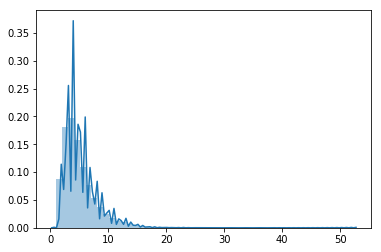

In [24]:
sns.distplot(len_vec)

In [0]:
len_vec = [len(sent_vec) for sent_vec in train_q2_seq]

In [26]:
np.max(len_vec)

97

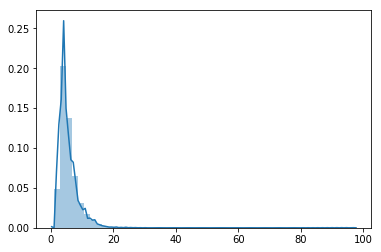

In [27]:
sns.distplot(len_vec)

In [0]:
max_len = 30

In [0]:
train_q1_seq = pad_sequences(train_q1_seq, maxlen=max_len, padding='post')

In [0]:
train_q2_seq = pad_sequences(train_q2_seq, maxlen=max_len, padding='post')
val_q1_seq = pad_sequences(val_q1_seq, maxlen=max_len, padding='post')
val_q2_seq = pad_sequences(val_q2_seq, maxlen=max_len, padding='post')
test_q1_seq = pad_sequences(test_q1_seq, maxlen=max_len, padding='post')
test_q2_seq = pad_sequences(test_q2_seq, maxlen=max_len, padding='post')

In [31]:
print(len(train_q1_seq[0]))
print(len(train_q2_seq[0]))
print(len(val_q1_seq[0]))
print(len(val_q2_seq[0]))
print(len(test_q1_seq[0]))
print(len(test_q1_seq[0]))

30
30
30
30
30
30


In [0]:
! pip install joblib

In [0]:
import joblib

In [35]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
embeddings_index = {}
f = open('drive/My Drive/movie_plot/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [36]:
len(embeddings_index.keys())

400000

In [37]:
len(embeddings_index['apple'])

300

In [38]:
not_present_list = []
vocab_size = len(t.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no'])))
for word, i in t.word_index.items():
    if word in embeddings_index.keys():
        embedding_vector = embeddings_index.get(word)
    else:
        not_present_list.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300)


Loaded 400000 word vectors.


In [40]:
embedding_matrix.shape

(65691, 300)

In [41]:
len(t.word_index) 

65690

In [0]:
#not_present_list

In [0]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Input, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract, Add, Conv2D

In [0]:
from keras import backend as K

def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [0]:
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)


In [0]:
input_1 = Input(shape=(train_q1_seq.shape[1],))
input_2 = Input(shape=(train_q2_seq.shape[1],))


common_embed = Embedding(name="synopsis_embedd",input_dim =len(t.word_index)+1, 
                       output_dim=len(embeddings_index['no']),weights=[embedding_matrix], 
                       input_length=train_q1_seq.shape[1],trainable=False) 
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)


common_lstm = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(lstm_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])

x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])
x4 = Subtract()([x1_, x2_])
    
    #https://stackoverflow.com/a/51003359/10650182
x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])
    
conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation="sigmoid", name = 'out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="binary_crossentropy", metrics=['acc',auroc], optimizer=Adam(0.00001))

In [126]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_53 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
input_54 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
synopsis_embedd (Embedding)     (None, 30, 300)      19707300    input_53[0][0]                   
                                                                 input_54[0][0]                   
__________________________________________________________________________________________________
lstm_17 (LSTM)                  (None, 30, 64)       93440       synopsis_embedd[0][0]            
          

In [128]:
model.fit([train_q1_seq,train_q2_seq],y_train.values.reshape(-1,1), epochs = 5,
          batch_size=64,validation_data=([val_q1_seq, val_q2_seq],y_val.values.reshape(-1,1)))

Train on 258743 samples, validate on 64686 samples
Epoch 1/5
258743/258743 [==============================] - 468s 2ms/step - loss: 0.6094 - acc: 0.6331 - auroc: 0.6962 - val_loss: 0.5867 - val_acc: 0.6503 - val_auroc: 0.7176
Epoch 2/5
258743/258743 [==============================] - 450s 2ms/step - loss: 0.5735 - acc: 0.6660 - auroc: 0.7360 - val_loss: 0.5676 - val_acc: 0.6717 - val_auroc: 0.7420
Epoch 3/5
258743/258743 [==============================] - 449s 2ms/step - loss: 0.5579 - acc: 0.6830 - auroc: 0.7531 - val_loss: 0.5561 - val_acc: 0.6842 - val_auroc: 0.7538
Epoch 4/5
258743/258743 [==============================] - 450s 2ms/step - loss: 0.5486 - acc: 0.6916 - auroc: 0.7626 - val_loss: 0.5502 - val_acc: 0.6902 - val_auroc: 0.7596
Epoch 5/5
258743/258743 [==============================] - 450s 2ms/step - loss: 0.5416 - acc: 0.6973 - auroc: 0.7689 - val_loss: 0.5446 - val_acc: 0.6956 - val_auroc: 0.7653
